<a href="https://colab.research.google.com/github/zeronyms/Machine-Learning/blob/main/CNN_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello World <br>
GEMASTIK 2024 <br>
T34M 3

In [1]:
import os
import zipfile
from google.colab import drive
import tensorflow as tf
from keras import datasets, layers, models
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Dataset

## Downloading Dataset

Link dataset: https://www.kaggle.com/datasets/divyam6969/chest-xray-pneumonia-dataset/data

kaggle datasets download -d divyam6969/chest-xray-pneumonia-dataset



In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [ ]:
!kaggle datasets download -d divyam6969/chest-xray-pneumonia-dataset

Dataset URL: https://www.kaggle.com/datasets/divyam6969/chest-xray-pneumonia-dataset
License(s): MIT
chest-xray-pneumonia-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# Define the path to your zip file
file_path = '/content/chest-xray-pneumonia-dataset.zip'  # Replace 'your_file.zip' with your file's name

# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/kaggle/Pneumonia Image')  # Replace 'destination_folder' with your desired folder


## Load Dataset

In [5]:
train_dir = '/content/drive/MyDrive/kaggle/Pneumonia Image/train'
test_dir = '/content/drive/MyDrive/kaggle/Pneumonia Image/test'
print("Train directory: ",os.listdir(train_dir))
print("Test directory: ",os.listdir(test_dir))

Train directory:  ['BACTERIAL', 'NORMAL', 'VIRAL']
Test directory:  ['IM-0016_normal_0001.jpeg', 'IM-0017_normal_-0001.jpeg', 'IM-0019_normal_-0001.jpeg', 'IM-0021_normal_-0001.jpeg', 'IM-0023_normal_-0001.jpeg', 'IM-0025_normal_-0001.jpeg', 'IM-_normal_0022-0001.jpeg', 'IM-_normal_0027-0001.jpeg', 'IM-_normal_0028-0001.jpeg', 'IM-_normal_0029-0001.jpeg', 'person626_bacteria_2502.jpeg', 'person626_virus_1202.jpeg', 'person627_virus_1204.jpeg', 'person628_bacteria_2505.jpeg', 'person628_virus_1206.jpeg', 'person629_bacteria_2506.jpeg', 'person629_bacteria_2507.jpeg', 'person629_bacteria_2508.jpeg', 'person629_bacteria_2509.jpeg', 'person629_bacteria_2510.jpeg', 'person629_virus_1207.jpeg', 'person630_bacteria_2512.jpeg', 'person630_bacteria_2513.jpeg', 'person630_bacteria_2514.jpeg', 'person630_bacteria_2515.jpeg', 'person630_bacteria_2516.jpeg', 'person630_virus_1209.jpeg', 'person632_bacteria_2520.jpeg', 'person632_bacteria_2521.jpeg', 'person632_virus_1211.jpeg', 'person633_bacteria_

In [6]:
# Test dipakai untuk test model setelah selesai di build
main_dir = train_dir

In [7]:
batch_size = 32
img_height = 180
img_width = 180

## My Model

In [8]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 30,
    zoom_range = 0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip = True,
    validation_split=0.2,
)

In [9]:
# Data Generators
train_generator = datagen.flow_from_directory(
    main_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    subset='training',
    # class_mode='sparse'  # Set to 'sparse' for sparse categorical crossentropy
)

validation_generator = datagen.flow_from_directory(
    main_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    subset='validation',
    # class_mode='sparse'  # Set to 'sparse' for sparse categorical crossentropy
)

Found 4173 images belonging to 3 classes.
Found 1043 images belonging to 3 classes.


In [10]:
# Get the class names and the number of classes
class_names = list(train_generator.class_indices.keys())
num_classes = len(class_names)

# Print the class names and the number of classes
print(class_names)
print(num_classes)


['BACTERIAL', 'NORMAL', 'VIRAL']
3


In [24]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Get a batch of images and labels from the train generator
# images, labels = next(train_generator)

# # Convert labels to class indices
# labels = np.argmax(labels, axis=1)

# # Plot the first 9 images from the batch
# plt.figure(figsize=(10, 10))
# for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i])
#     plt.title(class_names[labels[i]])
#     plt.axis("off")
# plt.show()


In [25]:
for image_batch, labels_batch in train_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32, 3)


In [19]:
model = models.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu',input_shape=(img_height, img_width, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [25]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 22, 22, 64)       

In [ ]:
# Train the model
epochs = 10
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

Epoch 1/10
118/131 [==========================>...] - ETA: 3:49 - loss: 1.0618 - accuracy: 0.2470

## Tensorflow Base Model

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  main_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
  main_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5216 files belonging to 3 classes.
Using 4173 files for training.
Found 5216 files belonging to 3 classes.
Using 1043 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['BACTERIAL', 'NORMAL', 'VIRAL']


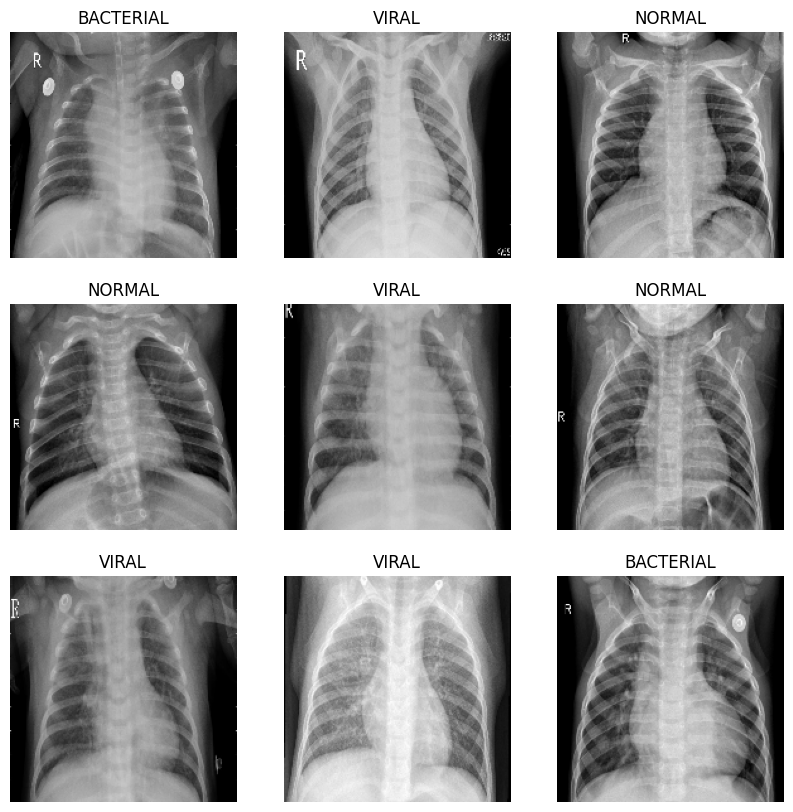

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
num_classes = len(class_names)

model = models.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 90, 90, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 45, 45, 64)       

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
131/131 [==============================] - 230s 2s/step - loss: 0.7625 - accuracy: 0.6775 - val_loss: 0.5089 - val_accuracy: 0.7843
Epoch 2/10
131/131 [==============================] - 213s 2s/step - loss: 0.4919 - accuracy: 0.7848 - val_loss: 0.4879 - val_accuracy: 0.7939
Epoch 3/10
131/131 [==============================] - 208s 2s/step - loss: 0.4492 - accuracy: 0.8004 - val_loss: 0.4649 - val_accuracy: 0.7900
Epoch 4/10
131/131 [==============================] - 206s 2s/step - loss: 0.4131 - accuracy: 0.8169 - val_loss: 0.4717 - val_accuracy: 0.7939
Epoch 5/10
131/131 [==============================] - 211s 2s/step - loss: 0.3757 - accuracy: 0.8325 - val_loss: 0.4708 - val_accuracy: 0.7824
Epoch 6/10
131/131 [==============================] - 247s 2s/step - loss: 0.3505 - accuracy: 0.8423 - val_loss: 0.5011 - val_accuracy: 0.7872
Epoch 7/10
131/131 [==============================] - 243s 2s/step - loss: 0.3220 - accuracy: 0.8543 - val_loss: 0.4840 - val_accuracy: 0.7977

In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
model = models.Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
131/131 [==============================] - 238s 2s/step - loss: 0.9905 - accuracy: 0.5325 - val_loss: 0.8097 - val_accuracy: 0.6242
Epoch 2/15
131/131 [==============================] - 234s 2s/step - loss: 0.7661 - accuracy: 0.6588 - val_loss: 0.7373 - val_accuracy: 0.6625
Epoch 3/15
131/131 [==============================] - 230s 2s/step - loss: 0.6790 - accuracy: 0.7017 - val_loss: 0.7103 - val_accuracy: 0.6520
Epoch 4/15
131/131 [==============================] - 227s 2s/step - loss: 0.6645 - accuracy: 0.7132 - val_loss: 0.6460 - val_accuracy: 0.7124
Epoch 5/15
131/131 [==============================] - 226s 2s/step - loss: 0.6230 - accuracy: 0.7338 - val_loss: 0.6340 - val_accuracy: 0.7392
Epoch 6/15
131/131 [==============================] - 227s 2s/step - loss: 0.6160 - accuracy: 0.7316 - val_loss: 0.6435 - val_accuracy: 0.7344
Epoch 7/15
131/131 [==============================] - 234s 2s/step - loss: 0.5768 - accuracy: 0.7515 - val_loss: 0.5792 - val_accuracy: 0.7641

## Visualize the graphic of loss and accuracy

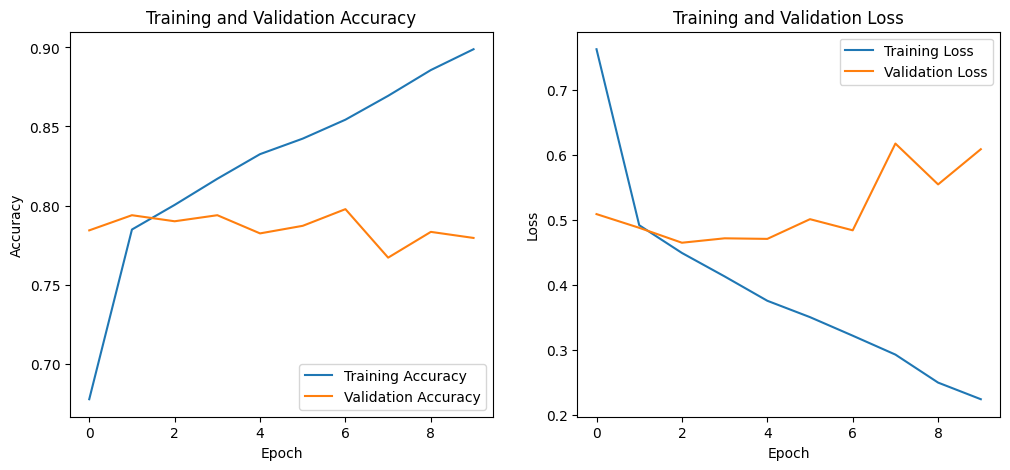

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()
